In [1]:
# Install necessary dependencies
!pip install torch torchvision tensorboard kagglehub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [1]:
# Importing required libraries
import kagglehub
import os
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

100%|██████████| 2.29G/2.29G [00:17<00:00, 143MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2
Dataset directory contents: ['val', 'test', '__MACOSX', 'chest_xray', 'train']


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 0.217897653499721, Validation Loss: 1.0697542428970337
Epoch 2/10, Train Loss: 0.12169659987343417, Validation Loss: 0.9197200536727905
Epoch 3/10, Train Loss: 0.10893680686073984, Validation Loss: 0.4337610900402069
Epoch 4/10, Train Loss: 0.09860338227526268, Validation Loss: 1.290279507637024
Epoch 5/10, Train Loss: 0.09072129709783233, Validation Loss: 0.47484153509140015
Epoch 6/10, Train Loss: 0.07684829915542316, Validation Loss: 0.20435069501399994
Epoch 7/10, Train Loss: 0.07085961706513551, Validation Loss: 1.6744277477264404
Epoch 8/10, Train Loss: 0.08572253400597013, Validation Loss: 0.27028414607048035
Epoch 9/10, Train Loss: 0.07014383210806302, Validation Loss: 0.6072438359260559
Epoch 10/10, Train Loss: 0.07284599650319826, Validation Loss: 0.36129194498062134


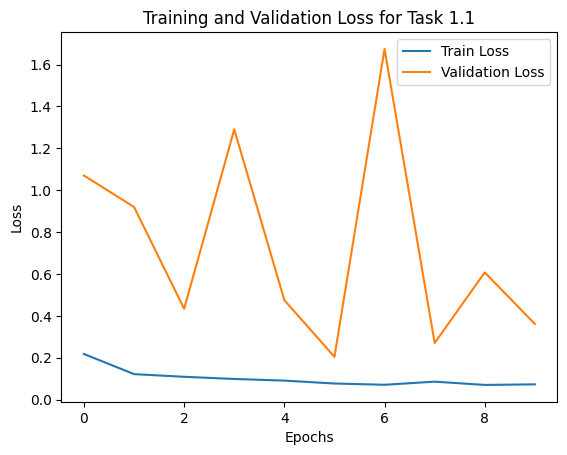

In [2]:
# Task 1.1: Training ResNet-18 from scratch

# Download the dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)

# Check the contents of the dataset directory
dataset_dir = os.path.join(path, "chest_xray")
print("Dataset directory contents:", os.listdir(dataset_dir))

# Define data transformations for training, validation, and testing
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize to match ResNet input size
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.ToTensor(),   # Convert images to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization based on ImageNet stats
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_data = datasets.ImageFolder(root=os.path.join(dataset_dir, 'train'), transform=transform_train)
val_data = datasets.ImageFolder(root=os.path.join(dataset_dir, 'val'), transform=transform_val)
test_data = datasets.ImageFolder(root=os.path.join(dataset_dir, 'test'), transform=transform_val)

# Create DataLoader for batching
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Initialize ResNet-18 model from scratch (random initialization)
model = models.resnet18(pretrained=False)  # Using a model with random initialization
model.fc = nn.Linear(model.fc.in_features, 2)  # Modify the final layer to have 2 output classes

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for classification tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer for better convergence

# Training loop for Task 1.1 - Train from scratch
epochs = 10  # Number of epochs
train_loss = []
val_loss = []

for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        running_loss += loss.item()

    train_loss.append(running_loss / len(train_loader))

    # Validation step
    model.eval()  # Set model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad():  # No need to compute gradients during evaluation
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    val_loss.append(running_val_loss / len(val_loader))

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss[-1]}, Validation Loss: {val_loss[-1]}')

# Plotting the loss curves for Task 1.1
plt.plot(range(epochs), train_loss, label='Train Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss for Task 1.1")
plt.show()


Epoch 1/10, Fine-Tuning Train Loss: 0.9450049656300457, Fine-Tuning Validation Loss: 0.8929266929626465
Epoch 2/10, Fine-Tuning Train Loss: 0.9435104270654222, Fine-Tuning Validation Loss: 0.9007740020751953
Epoch 3/10, Fine-Tuning Train Loss: 0.9418062143530582, Fine-Tuning Validation Loss: 0.9024643898010254
Epoch 4/10, Fine-Tuning Train Loss: 0.9415624426917796, Fine-Tuning Validation Loss: 0.9003477692604065
Epoch 5/10, Fine-Tuning Train Loss: 0.9440835973967804, Fine-Tuning Validation Loss: 0.9058946967124939
Epoch 6/10, Fine-Tuning Train Loss: 0.9428421449076179, Fine-Tuning Validation Loss: 0.9014654755592346
Epoch 7/10, Fine-Tuning Train Loss: 0.939319889969621, Fine-Tuning Validation Loss: 0.9042915105819702
Epoch 8/10, Fine-Tuning Train Loss: 0.942708630503321, Fine-Tuning Validation Loss: 0.9046334624290466
Epoch 9/10, Fine-Tuning Train Loss: 0.9449244869267283, Fine-Tuning Validation Loss: 0.8987256288528442
Epoch 10/10, Fine-Tuning Train Loss: 0.943972493241901, Fine-Tunin

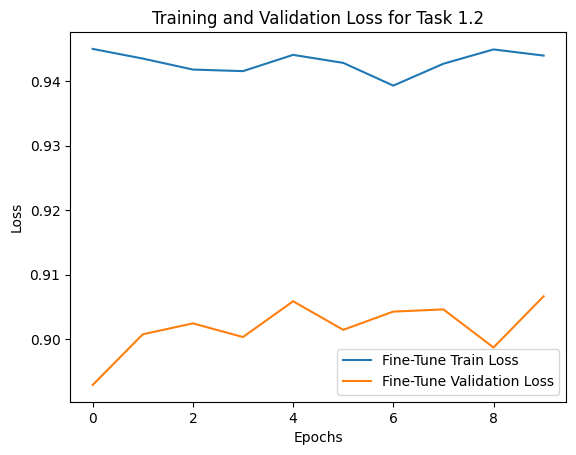

In [6]:
# Task 1.2: Fine-tuning pre-trained ResNet-18 on the X-ray dataset


# Load pre-trained ResNet-18 (pre-trained on ImageNet)
pretrained_model = models.resnet18(weights="IMAGENET1K_V1")  # Use the latest weights
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, 2)  # Modify final layer for binary classification

# Freeze all layers except the final fully connected layer (fine-tuning)
for param in pretrained_model.parameters():
    param.requires_grad = False  # Freeze layers to avoid updating during training

# Only allow the final fully connected layer to update during training
pretrained_model.fc.requires_grad = True

# Ensure the model is on the correct device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pretrained_model = pretrained_model.to(device)  # Move the model to the device

# Define optimizer for fine-tuning (only the final layer parameters)
optimizer_ft = optim.Adam(pretrained_model.fc.parameters(), lr=0.0001)

# Fine-tuning loop for Task 1.2
train_loss_ft = []
val_loss_ft = []

for epoch in range(epochs):
    pretrained_model.train()  # Set model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Move inputs and labels to the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer_ft.zero_grad()  # Clear previous gradients
        outputs = pretrained_model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        # loss.backward()  # Backpropagation
        optimizer_ft.step()  # Update weights
        running_loss += loss.item()

    train_loss_ft.append(running_loss / len(train_loader))

    # Validation step
    pretrained_model.eval()  # Set model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad():  # No need to compute gradients during evaluation
        for inputs, labels in val_loader:
            # Move inputs and labels to the same device as the model
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = pretrained_model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    val_loss_ft.append(running_val_loss / len(val_loader))

    print(f'Epoch {epoch+1}/{epochs}, Fine-Tuning Train Loss: {train_loss_ft[-1]}, Fine-Tuning Validation Loss: {val_loss_ft[-1]}')

# Plotting the loss curves for Task 1.2
plt.plot(range(epochs), train_loss_ft, label='Fine-Tune Train Loss')
plt.plot(range(epochs), val_loss_ft, label='Fine-Tune Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss for Task 1.2")
plt.show()



In [14]:
# Evaluate the model on the test dataset
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    class_correct = [0, 0]  # Track correct predictions for each class
    class_total = [0, 0]  # Track total samples for each class

    with torch.no_grad():  # No gradients needed during evaluation
        for inputs, labels in test_loader:
            # Move inputs and labels to the same device as the model
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get predicted class

            # Update total and correct counts
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Track class-wise accuracy
            for i in range(labels.size(0)):
                label = labels[i]
                class_total[label] += 1
                class_correct[label] += (predicted[i] == label).item()

    # Calculate overall accuracy and class-wise accuracies
    accuracy = 100 * correct / total if total != 0 else 0
    class_accuracies = [100 * c / t if t != 0 else 0 for c, t in zip(class_correct, class_total)]

    # Print results
    print(f'Overall Accuracy: {accuracy}%')
    print(f'Pneumonia Accuracy: {class_accuracies[0]}%')
    print(f'Normal Accuracy: {class_accuracies[1]}%')

# Ensure the model is on the correct device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pretrained_model = pretrained_model.to(device)  # Move the model to the device

# Call the evaluation function
evaluate_model(pretrained_model, test_loader)


Overall Accuracy: 38.30128205128205%
Pneumonia Accuracy: 91.45299145299145%
Normal Accuracy: 6.410256410256411%


In [9]:
# Evaluate the fine-tuned model
# evaluate_model(pretrained_model, test_loader)
inputs, labels = inputs.to(device), labels.to(device)



In [10]:

# Visualize misclassifications (incorrect predictions)
def visualize_misclassifications(model, test_loader):
    model.eval()  # Set model to evaluation mode
    misclassified_images = []
    misclassified_labels = []
    misclassified_preds = []

    with torch.no_grad():  # No gradients needed during evaluation
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get predicted class
            incorrect = predicted != labels  # Find incorrect predictions
            misclassified_images.extend(inputs[incorrect])  # Store misclassified images
            misclassified_labels.extend(labels[incorrect])  # Store true labels
            misclassified_preds.extend(predicted[incorrect])  # Store predicted labels

    # Plot the misclassified images
    fig, axes = plt.subplots(1, 5, figsize=(15, 15))
    for i in range(5):
        axes[i].imshow(misclassified_images[i].permute(1, 2, 0))  # Convert back to image format
        axes[i].set_title(f'True: {misclassified_labels[i]}, Pred: {misclassified_preds[i]}')
        axes[i].axis('off')  # Hide axis
    plt.show()

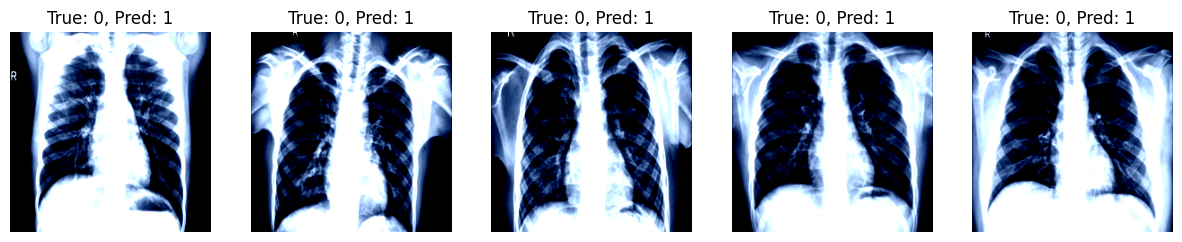

In [13]:
def visualize_misclassifications(model, test_loader):
    model.eval()  # Set model to evaluation mode
    misclassified_images = []
    misclassified_labels = []
    misclassified_preds = []

    with torch.no_grad():  # No need to compute gradients during evaluation
        for inputs, labels in test_loader:
            # Move inputs and labels to the same device as the model
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get predicted class
            incorrect = predicted != labels  # Find incorrect predictions

            # Store misclassified images, labels, and predictions
            misclassified_images.extend(inputs[incorrect])
            misclassified_labels.extend(labels[incorrect])
            misclassified_preds.extend(predicted[incorrect])

    # Plot the misclassified images
    fig, axes = plt.subplots(1, 5, figsize=(15, 15))
    for i in range(5):
        axes[i].imshow(misclassified_images[i].cpu().permute(1, 2, 0))  # Move to CPU for plotting and change to HWC
        axes[i].set_title(f'True: {misclassified_labels[i].item()}, Pred: {misclassified_preds[i].item()}')
        axes[i].axis('off')
    plt.show()

# Visualize misclassifications for the fine-tuned model
visualize_misclassifications(pretrained_model, test_loader)
